# Исследования  сервиса «Ненужные вещи»

### Описание

В приложении «Ненужные вещи» пользователи совершают много действий, по ним накопилось много данных и мы уверены, что в этих данных есть инсайты, которые позволят нам стать лучшим приложением для продажи ненужных вещей.

Датасет полученный мной содержит данные о событиях, совершенных в мобильном приложении
"Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая
их на доске объявлений.
В датасете содержатся данные пользователей, впервые совершивших действия в
приложении после 7 октября 2019 года.

### Задачи

1)Подключение библиотек, выгрузка, осмотр данных

2)Подготовка,предобработка данных

3)Изучение данных

3.1)Смотрим общее поведение пользователей по метрикам

3.2)Retention Rate

3.3)Время в приложении

3.4)Частота совершения событий

3.5)Конверсия в целевое действие contacts_show

4)Делаем сегментацию по одному из признаков (на 3/4 группы)

4.1)Какая из групп лучше по конверсии

4.2)Какая из групп лучше по Retention

5)Гипотезы

5.1) Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

5.2)Пользователи установившие приложение на выходных имеют более длительный Retention

##  Подключение библиотек, выгрузка и осмотр данных

In [5]:
import pandas as pd
import datetime
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import math as mth
from scipy import stats as st

In [6]:
mobile_sourсes = pd.read_csv('/Users/Риндикт/notebook/Ненужные вещи/mobile_soures.csv')
mobile_dataset = pd.read_csv('/Users/Риндикт/notebook/Ненужные вещи/mobile_dataset.csv')

In [7]:
mobile_sourсes.head(5)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [8]:
mobile_dataset.head(5)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Подключил библиотеки, и вывел данные на экран 

##  Предобработка данных

Создаю функцию для обработки датасетов что бы избежать дублирования кода

In [9]:
def info(data):
    ''' 
    функция для предварительной обработки датасетов
    '''
    
    print("Дубликатов обнаружено: ", data.duplicated().sum())
    if data.duplicated().sum() >0:
        print('Обнаружены дубликаты, произвожу очистку')
        data = data.drop_duplicates()
        print('Дубликаты ',data.duplicated().sum())
    print()
    print('Пропусков обнаружено:', data.isna().sum())
    print()
    data.info()
    return data

Прогоняю датасеты через функцию

In [10]:
mobile_sourсes = info(mobile_sourсes)

Дубликатов обнаружено:  0

Пропусков обнаружено: userId    0
source    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [11]:
mobile_dataset = info(mobile_dataset)

Дубликатов обнаружено:  0

Пропусков обнаружено: event.time    0
event.name    0
user.id       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Переименовываю колонки

In [12]:
mobile_sourсes = mobile_sourсes.rename(columns= {'userId':'user_id'})
mobile_dataset = mobile_dataset.rename(columns={'event.time':'event_time','event.name':'event_name','user.id':'user_id'})

Изменяю тип данных

In [13]:
mobile_dataset.event_time = pd.to_datetime(mobile_dataset.event_time)

Создаю общий профиль для дальнейшей работы

In [14]:
profiles = mobile_dataset.merge(mobile_sourсes, how='inner',on= 'user_id')
profiles = info(profiles)

Дубликатов обнаружено:  0

Пропусков обнаружено: event_time    0
event_name    0
user_id       0
source        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


In [15]:
profiles.describe()

C:\Users\Риндикт\AppData\Local\Temp\ipykernel_11604\887319246.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  profiles.describe()


,event_time,event_name,user_id,source
count,74197,74197,74197,74197
unique,74197,16,4293,3
top,2019-10-07 00:00:00.431357,tips_show,cb36854f-570a-41f4-baa8-36680b396370,yandex
freq,1,40055,478,34286
first,2019-10-07 00:00:00.431357,NaN,NaN,NaN
last,2019-11-03 23:58:12.532487,NaN,NaN,NaN


In [16]:
profiles['date'] = pd.to_datetime(profiles.event_time).dt.date
profiles['weekday'] = pd.to_datetime(profiles.date).dt.dayofweek

In [17]:
profiles.head()

,event_time,event_name,user_id,source,date,weekday
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0


In [18]:
profiles.event_name = profiles.event_name.str.replace('show_contacts','contacts_show')
profiles.event_name.value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

### Итог

Я проверил на дубликаты, исправил название колонок (на более удобные) и тип данных на datetime для дальнейшей работы с ним, добавил колонку с датой

## Функции

In [19]:
def plot_conversion(df,observ,source):
    '''
    Функция для визуализации конверсии по дням
    '''
    convers = []
    horizon =  range(0,observ)
    for i in horizon:
        conversion_i = df.query('event_name == "contacts_show" and weekday == @i')['user_id'].\
        nunique() / df[df['weekday'] == i].user_id.nunique()
        convers.append(round(conversion_i,2))
    df = pd.DataFrame(data = convers, index = horizon )
    plt.figure(figsize=(25, 6))   
    ax1 = plt.subplot(1,2,1)
    df.plot(grid = True,ax = ax1)
    plt.title('Динамика конверсии пользователей за {} дней из источника {}'.format(observ,source))
    plt.xlabel('День недели')
    plt.ylabel('Конверсия')
    

In [20]:
def retention_rate(data,horizon):
    retention = data.pivot_table(index = pd.to_datetime(profiles.first_session).dt.date,\
                                 columns=data.query('lifetime<@horizon').\
                                 lifetime,values = 'user_id', aggfunc='nunique').fillna(0)
    retention = retention.div(retention[0],axis = 0)
    
    plt.figure(figsize=(15, 10))
    sns.heatmap(retention.drop(columns=[0]),annot = True, fmt ='.2%')
    plt.title('Хитмап для Retention rate')
    plt.ylabel('Дата начала когорты')
    plt.xlabel('Лайфтайм')
    plt.show()
    return retention

In [21]:
def retention_rate_new(data,horizon,name_group,ylabel='Источники'):
    '''
    Функция для подсчёта ретеншен рейта по когортам и построения хитмап принимающая до 3х групп
    '''
    df = pd.DataFrame()
    for i in data:
        count = 0
        retention = i.pivot_table(index = pd.to_datetime(i.first_session).dt.date,\
                                     columns=i.query('lifetime<@horizon').\
                                     lifetime,values = 'user_id', aggfunc='nunique').sum(axis=0)
        retention = retention.reset_index().rename(columns={0:name_group[count]})

        retention_goog = retention.pivot_table(columns='lifetime', values = name_group[count])
        count+=1
        df = df.append(retention_goog, ignore_index=True)
        if len(name_group)==1:
            df = df.rename(index={0:name_group[0]})
        elif len(name_group)==2:
            df = df.rename(index={0:name_group[0],1 : name_group[1]})
        elif len(name_group)==3:
            df = df.rename(index={0:name_group[0],1 : name_group[1],2:name_group[2]})       
    
    df = df.div(df[0.0],axis = 0)
    
    plt.figure(figsize=(20, 10))
    sns.heatmap(df.drop(columns=[0]),annot = True, fmt ='.2%')
    plt.title('Хитмап для Retention rate')
    plt.ylabel(ylabel)
    plt.xlabel('Лайфтайм')
    return df

In [22]:
def ztest(data_one,second_data):
    alpha = 0.01
    p1 = data_one[0]/second_data[0]
    p2 = data_one[1]/second_data[1]
    
    p_combined = (data_one[0]+data_one[1])/(second_data[0]+second_data[1])
    
    difference = p1-p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/second_data[0] + 1/second_data[1]))
    
    distr = st.norm(0,1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

## Изучение данных

In [23]:
profiles.head(15)

,event_time,event_name,user_id,source,date,weekday
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
5,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
6,2019-10-07 00:02:01.354436,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
7,2019-10-07 00:02:25.457498,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
8,2019-10-07 00:02:30.856380,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0
9,2019-10-07 00:03:02.305654,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0


In [24]:
session_start = profiles.groupby('user_id',as_index=False).agg({'event_time':'min'}).rename(columns={'event_time':'first_session'})
profiles = profiles.merge(session_start,how='left',on='user_id')
profiles.head(5)

,event_time,event_name,user_id,source,date,weekday,first_session
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00.431357
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00.431357
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00.431357
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00.431357
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,2019-10-07 00:00:00.431357


In [25]:
profiles['lifetime'] = (profiles.event_time-profiles.first_session).dt.days
retention = profiles.pivot_table(index = pd.to_datetime(profiles.first_session).dt.date,\
                                 columns=profiles.query('lifetime<22').lifetime,values = 'user_id', aggfunc='nunique')

### Retantion

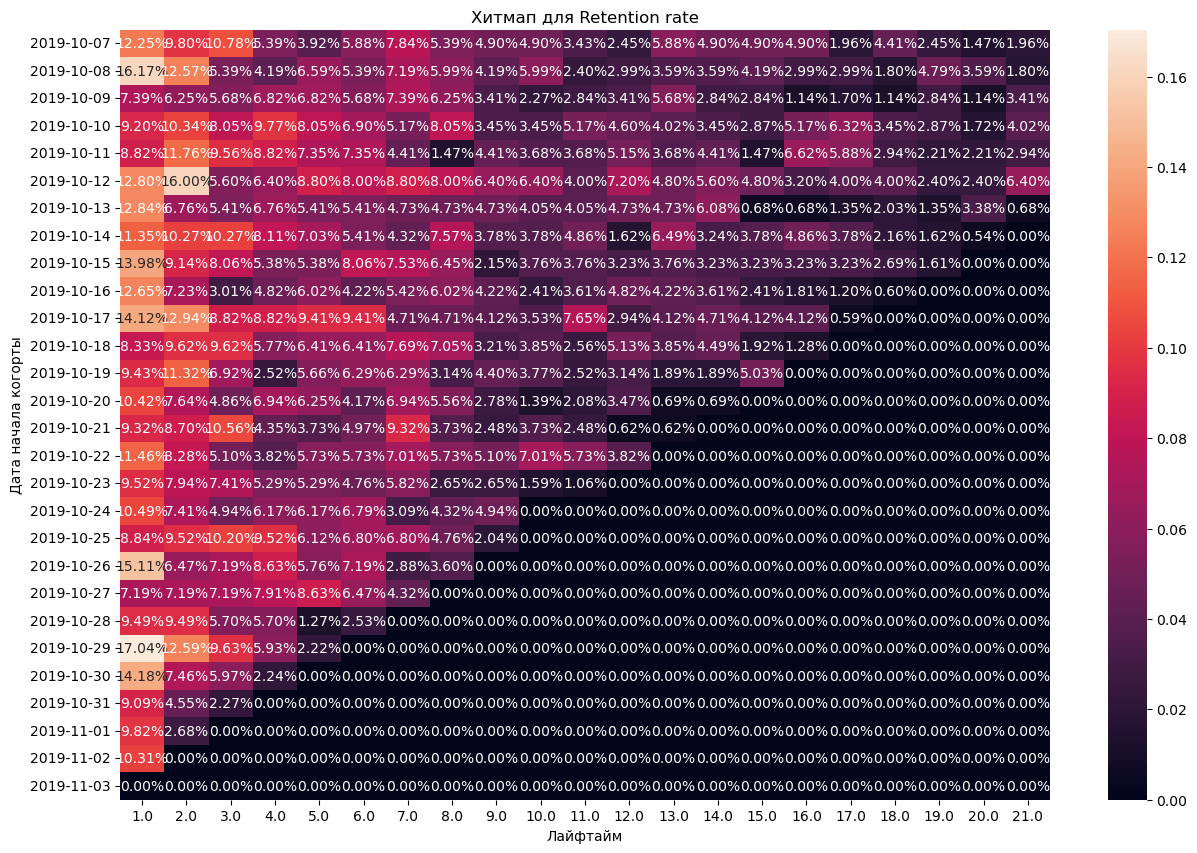

In [26]:
retention = retention_rate(profiles,22)

Тут видно что на 2ой день заходят в среднем процентов ~11 на 7ой день ~6% на 14 ~4% а на 21 видно что всё еще остаются активные пользователи, так же в какие то из дней получаются когорты более активные

### Время в приложении

Разбираюсь сколько времени пользователи проводят за сессию(её принимаю за календарный день)

Создаю колонки с первым заходом в день и последним, вычитаю и получаю длину сессии

In [27]:
profiles = profiles.sort_values(['user_id', 'event_time'])
profiles['min'] = profiles.groupby(['user_id','date'])['event_time'].transform('min')
profiles['max'] = profiles.groupby(['user_id','date'])['event_time'].transform('max')
profiles['time_session'] = round((profiles['max']-profiles['min']).dt.seconds / 60,2)

In [28]:
profiles.head(5)

,event_time,event_name,user_id,source,date,weekday,first_session,lifetime,min,max,time_session
2171,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92
2172,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92
2173,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92
2174,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92
2175,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92


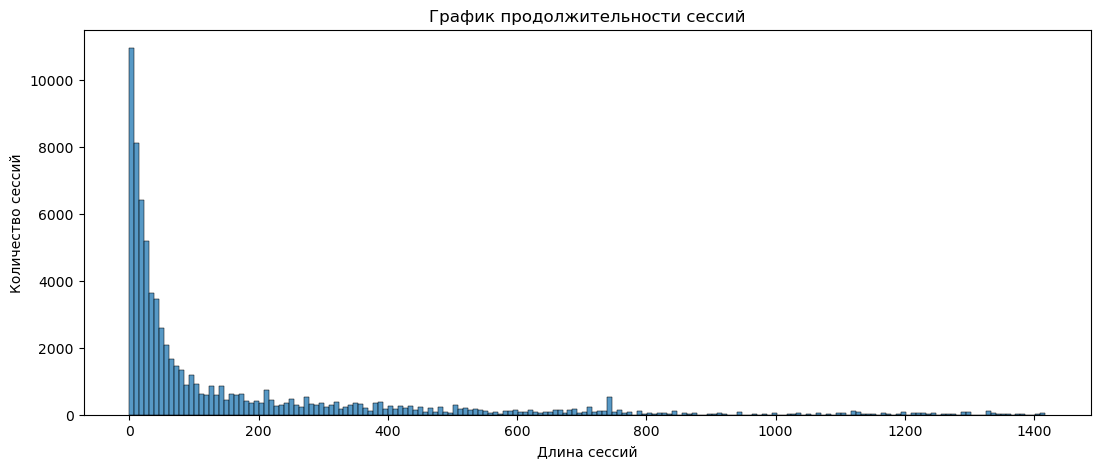

In [29]:
plt.figure(figsize = (13,5))
sns.histplot(profiles,x = 'time_session')
plt.title('График продолжительности сессий')
plt.ylabel('Количество сессий')
plt.xlabel('Длина сессий')
plt.show()

In [30]:
round(profiles.time_session.mean())

152

Тут видно что большинство сессий длятся меньше пары минут, среднее время сессий 152минуты, а так же длинный хвост

In [31]:
np.percentile(profiles.time_session,95)

693.15

In [32]:
np.percentile(profiles.time_session,1)

0.0

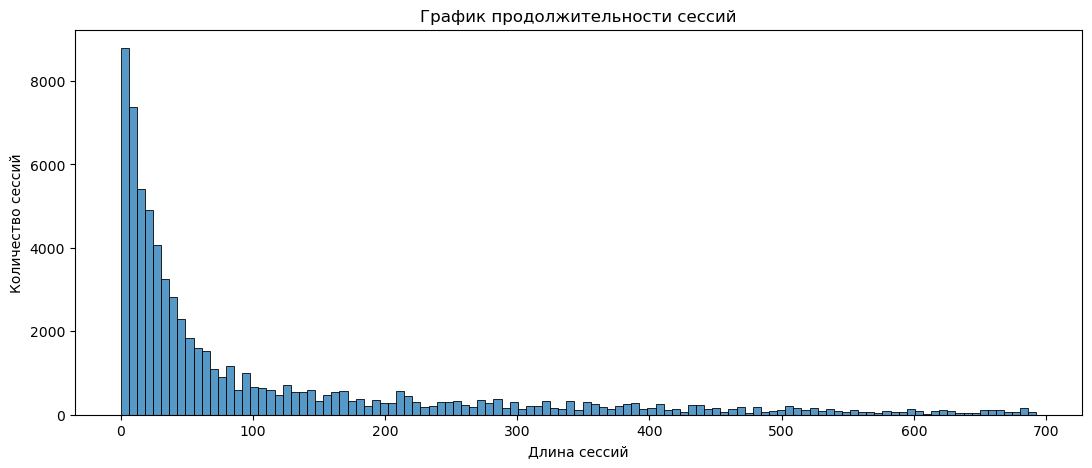

In [33]:
percentil95 = np.percentile(profiles.time_session,95)
plt.figure(figsize = (13,5))
sns.histplot(profiles.query('time_session < @percentil95'),x = 'time_session')
plt.title('График продолжительности сессий')
plt.ylabel('Количество сессий')
plt.xlabel('Длина сессий')
plt.show()

In [34]:
round(profiles.query('time_session < @percentil95').time_session.mean())

110

Теперь приняв последние 5 процентиль за выброс видно, что длина хвоста уменьшилась в двое, а среднее время стало равно 110 минутам

Сессии длинной в 0 решил оставить так как пользователи могли просто зайти по ссылке и посмотреть на товар и в этом вряд ли какая-то ошибка

In [35]:
zero_event = profiles.query('time_session == 0 and event_name == "tips_show"')
print('Пользователи которые только зашли по рекомендации но не пошли дальше', zero_event.user_id.count())

Пользователи которые только зашли по рекомендации но не пошли дальше 399


### Частота совершения событий

Смотрю количество событий для каждого пользователя в день

In [36]:
count_event_of_day = profiles.groupby(['user_id','date'],as_index=False).agg({'event_time':'count'})\
.rename(columns={'event_time':'count_events'})
count_event_of_day.head(5)

,user_id,date,count_events
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,4
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,14
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,8
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,9


Добавляю номер и день недели

In [37]:
count_event_of_day['weekday'] = pd.to_datetime(count_event_of_day.date).dt.dayofweek
count_event_of_day['day_name'] = pd.to_datetime(count_event_of_day.date).dt.day_name()
count_event_of_day.head(5)

,user_id,date,count_events,weekday,day_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,9,0,Monday
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,4,2,Wednesday
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,14,0,Monday
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22,8,1,Tuesday
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19,9,5,Saturday


Смотрю 99 перцентиль что бы отсечь выбросы

In [38]:
np.percentile(count_event_of_day.count_events,99)

59.0

Строю график событий по дням

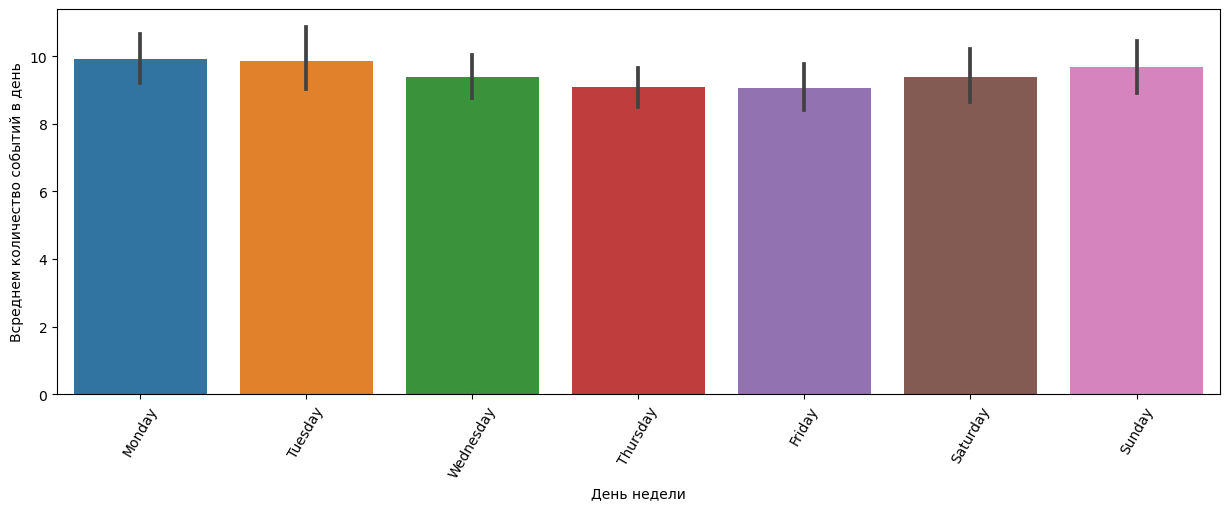

In [39]:
plt.figure(figsize = (15,5))
sns.barplot(data = count_event_of_day.query('count_events >0').sort_values(by = 'weekday'), x = 'day_name', y = 'count_events')
plt.xticks(rotation=60)
plt.ylabel('Всреднем количество событий в день')
plt.xlabel('День недели')
plt.show()

На данном графике видно что пользователи в среднем совершают 10 событий а в середине недели данный показатель немного опускается

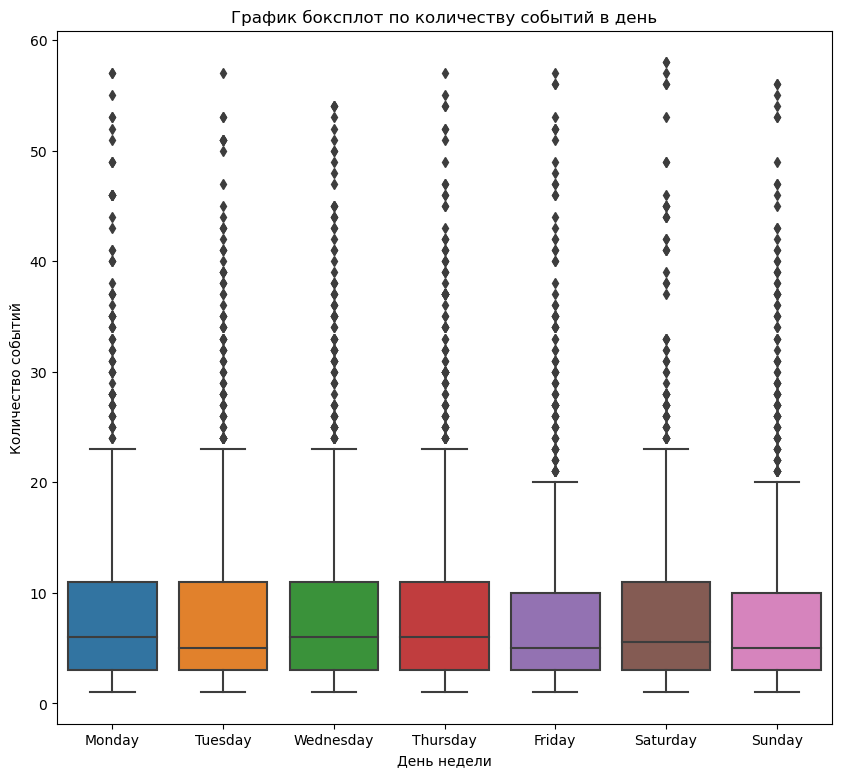

In [40]:
plt.figure(figsize = (10,9))
sns.boxplot(data = count_event_of_day.query('count_events <59')\
            .sort_values(by = 'weekday'),\
            x = 'day_name', y = 'count_events' )
plt.title('График боксплот по количеству событий в день')
plt.xlabel('День недели')
plt.ylabel('Количество событий')
plt.show()

На данном графике видно что во 2ом и 3ем квартиле находятся от ~3/4х событий в день до ~11
больше 20/23 событий это уже выбросы

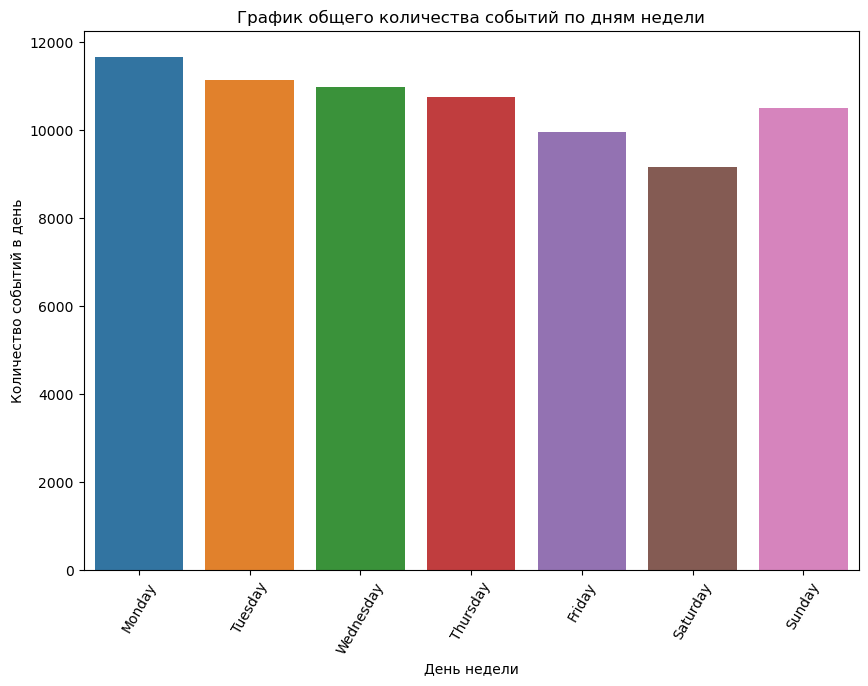

In [41]:
group_count_day = count_event_of_day.groupby(['weekday','day_name'],as_index=False).agg({'count_events':'sum'})
plt.figure(figsize = (10,7))
sns.barplot(data = group_count_day.sort_values(by = 'weekday'),x = 'day_name',y =  'count_events')
plt.xlabel('День недели')
plt.ylabel('Количество событий в день')
plt.title('График общего количества событий по дням недели')
plt.xticks(rotation = 60)
plt.show()

На данном графике видно что больше всего событий происходит в понедельник и они снижаются день ото дня к субботе, в воскресенье снова набирается активность

In [42]:
group_count_day

,weekday,day_name,count_events
0,0,Monday,11671
1,1,Tuesday,11145
2,2,Wednesday,10995
3,3,Thursday,10762
4,4,Friday,9969
5,5,Saturday,9154
6,6,Sunday,10501


### Conversion

In [43]:
conversion = profiles.query('event_name == "contacts_show"')['user_id'].nunique() / profiles.user_id.nunique()
conversion

0.22851153039832284

### Итог

Retention 7‑го дня ~ 6% на 14 ~4% Некоторые когорты более активные чем другие

Время в приложении в среднем сессии длятся 110 минут, есть много 0(совершающих только одно действие в приложении за сутки), так же есть выбросы на 700/1400 минут вероятно люди заходили в приложение ночью (после 0:00) и на следующий день перед сном
Частота совершения событий в сутки от 3/4 до 11/12 так же есть много выбросов (гиперактивные пользователи). 

В понедельник больше всего событий 11671, и они уменьшаются постепенно к субботе до 9154, в воскресенье снова начинается повышаться активность

Конверсия в целевое событие show_contacts составляет 0.22


##  Сегментация по одному из признаков (на 3/4 группы)

Решаю поделить по источникам так как предпологаю что пользовательская активность в них разная,и мы можем в дальнейшем выяснить какому из источников давать предпочтение

In [44]:
profiles.source.value_counts()

yandex    34286
google    20445
other     19466
Name: source, dtype: int64

In [45]:
yandex = profiles.query('source == "yandex"')
google = profiles.query('source == "google"')
other = profiles.query('source == "other"')

In [46]:
other.head(5)

,event_time,event_name,user_id,source,date,weekday,first_session,lifetime,min,max,time_session
2171,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92
2172,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92
2173,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92
2174,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92
2175,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,0,2019-10-07 13:39:45.989359,0,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9.92


### Определяю лучшую группу по конверсии

Смотрю на конверсию в каждой группе в целевое действие

In [47]:
conversion_y = yandex.query('event_name == "contacts_show"')['user_id'].nunique() / yandex.user_id.nunique()
conversion_g = google.query('event_name == "contacts_show"')['user_id'].nunique() / google.user_id.nunique()
conversion_o = other.query('event_name == "contacts_show"')['user_id'].nunique() / other.user_id.nunique()
print('Конверсия из Яндексе: ', conversion_y)
print('Конверсия из Google: ', conversion_g)
print('Конверсия из других источников: ', conversion_o)

Конверсия из Яндексе:  0.24715615305067218
Конверсия из Google:  0.24357838795394154
Конверсия из других источников:  0.18536585365853658


Конверсия из источника Яндекс немного выше остальных хотя и близка к конверсии Google, хуже всего конверсия из других источников она отстаёт от других ~ 5.5%

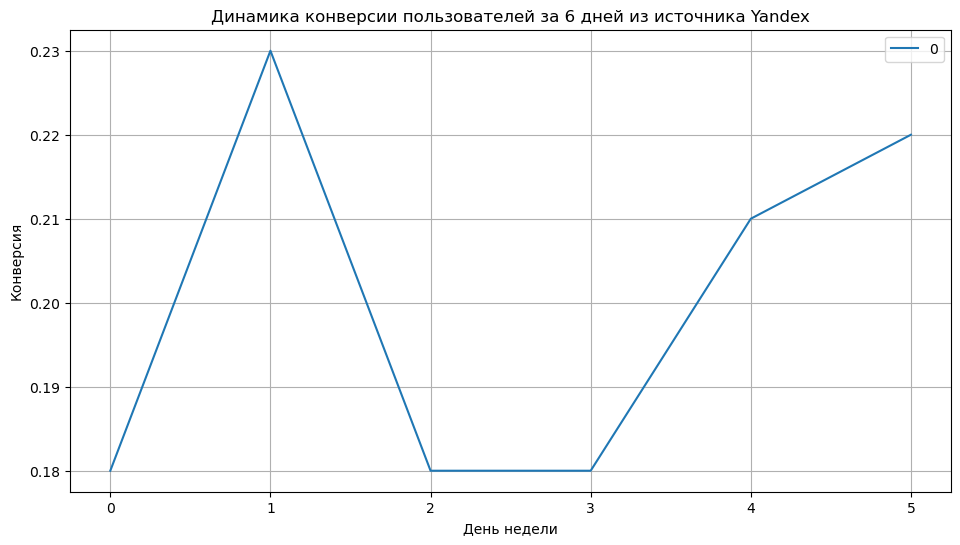

In [48]:
plot_conversion(yandex,6,'Yandex')

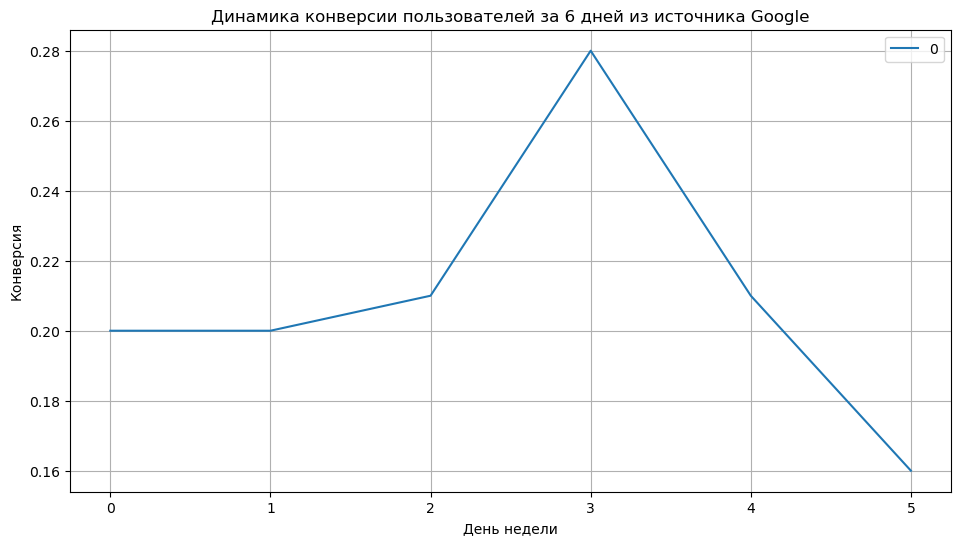

In [49]:
plot_conversion(google,6,'Google')

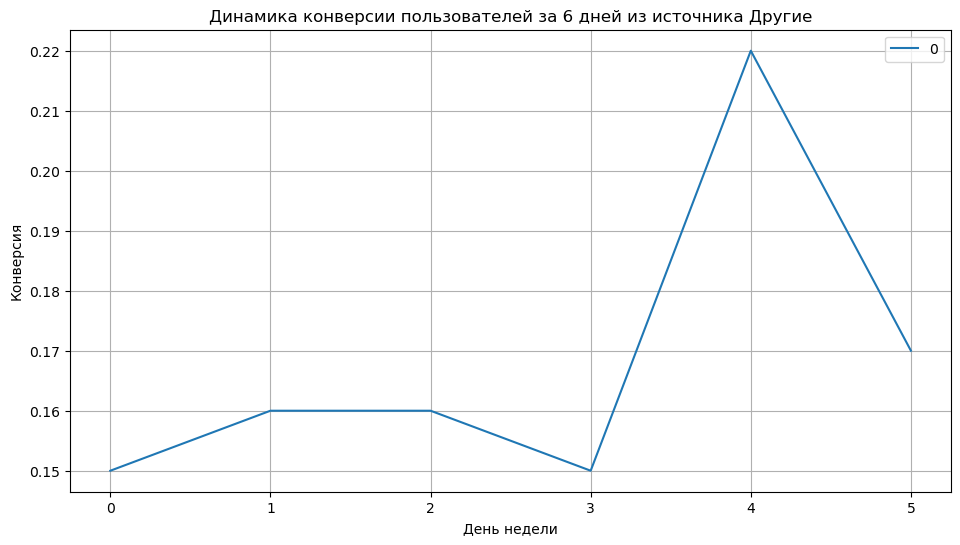

In [50]:
plot_conversion(other,6,'Другие')

По данным графикам мы видим разное поведение у пользователей.

У пользователей Яндекса большой подъем в начале недели и в конце в середине же спад.

У пользователей Google в течение недели поднимается конверсия, а к выходным сильный спад.

У пользователей других источников первые четыре дня невысокая активность, но в субботу резкий скачок и снова спад.

### Смотрю какая из групп лучше по Retention

Написал функцию для создания и визуализации ретеншен

In [51]:
group = [yandex,google,other]
name_group = ['yandex','google','other']

C:\Users\Риндикт\AppData\Local\Temp\ipykernel_11604\2386368082.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(retention_goog, ignore_index=True)
C:\Users\Риндикт\AppData\Local\Temp\ipykernel_11604\2386368082.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(retention_goog, ignore_index=True)
C:\Users\Риндикт\AppData\Local\Temp\ipykernel_11604\2386368082.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(retention_goog, ignore_index=True)


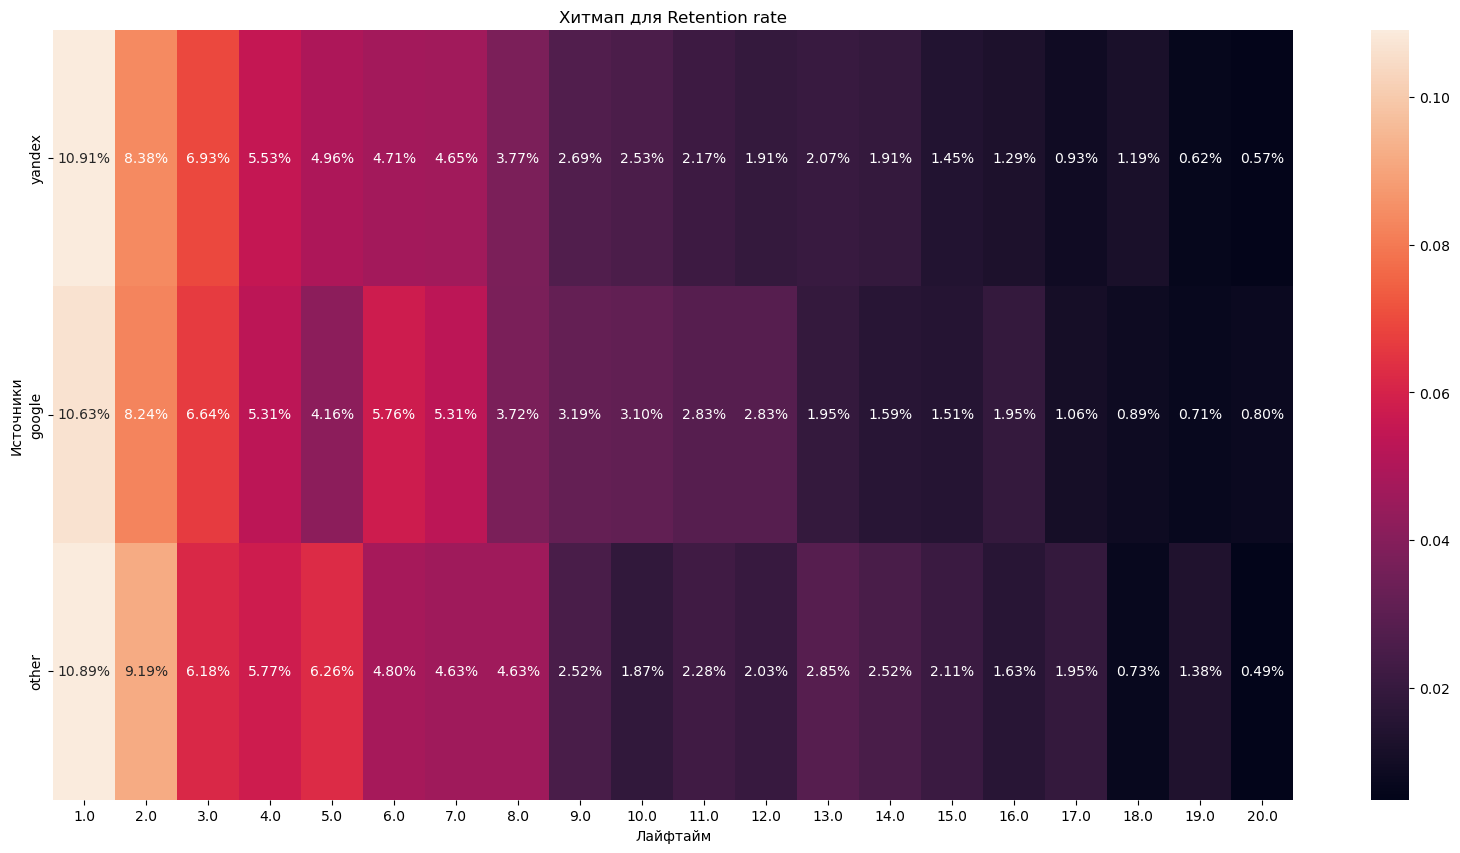

In [52]:
retention_rate_of_froup = retention_rate_new(group,21,name_group)

По данному графику вижу что ниже всего ретеншен у Яндекса, у Google выше, он постепенно снижается, у других источников непонятная просадка с 9-го по 12 день пользователи чаше возвращались в приложение

In [53]:
retention_rate_of_froup

lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
yandex,1.0,0.109100,0.083764,0.069286,0.055326,0.049638,0.047053,0.046536,0.037746,0.026887,...,0.021717,0.019131,0.020683,0.019131,0.014478,0.012927,0.009307,0.011892,0.006205,0.005688
google,1.0,0.106289,0.082374,0.066430,0.053144,0.041630,0.057573,0.053144,0.037201,0.031887,...,0.028344,0.028344,0.019486,0.015943,0.015058,0.019486,0.010629,0.008857,0.007086,0.007972
other,1.0,0.108943,0.091870,0.061789,0.057724,0.062602,0.047967,0.046341,0.046341,0.025203,...,0.022764,0.020325,0.028455,0.025203,0.021138,0.016260,0.019512,0.007317,0.013821,0.004878


### Итог 

Проведя исследования и построив графики выяснил что конверсия выше всего у источника Google (0.07).

Динамика конверсии за неделю постепенно нарастает, а в выходные идёт спад у источников Яндекс и Google а в других источниках наоборот со среды постоянная конверсия в 0.06.

В ретеншене по группам хуже себя показывает Яндекс, у Google довольно активные пользователи и 2 недели он лидирует, а у других источников просадка с 9‐го по 12 день, но дальше он показывает себя лучше других.

## Гипотезы

5.1) Некоторые пользователи установили приложение по ссылке из yandex,

другие — из google. Проверьте гипотезу: две эти группы

демонстрируют разную конверсию в просмотры контактов.


5.2)Пользователи установившие приложение на выходных имеют более длительный Retention

### Гипотеза первая

H_0 Конверсия обоих групп ровна

H_1 конверсия обоих групп не ровна

Проверяю есть ли пресечение между группами

In [54]:
ab_group =profiles.query('source == "yandex" and source == "google"')
ab_group.groupby('user_id').agg({'source':'nunique'}).query('source>1')

,source
user_id,


In [55]:
contacts_show = [yandex.query('event_name == "contacts_show"').user_id.nunique(),google.query('event_name == "contacts_show"').user_id.nunique()]
count_evets = [yandex.user_id.nunique(),google.user_id.nunique()]

ztest(contacts_show,count_evets)

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Гипотеза вторая

H_O У пользователей пришедших в приложение на выходных и пользователей что пришли на буднях Конверсии равны

H_1 Конверсии не равны

In [56]:
profiles['weekday_of_start'] = pd.to_datetime(profiles.first_session).dt.dayofweek
weekendstr = [5,6]
weekdays = profiles.query('weekday_of_start not in @weekendstr')
weekend = profiles.query('weekday_of_start in @weekendstr')


Проверяю есть ли пресечение между группами

In [57]:
a = weekdays.user_id.unique()
weekend.query('user_id in @a')

,event_time,event_name,user_id,source,date,weekday,first_session,lifetime,min,max,time_session,weekday_of_start


In [58]:
contacts_show =[weekdays.query('event_name == "contacts_show"').user_id.nunique(),weekend.query('event_name == "contacts_show"').user_id.nunique()]

count_events = [weekdays.user_id.nunique(),weekend.user_id.nunique()]
ztest(contacts_show,count_events)

p-значение:  0.49485113355625177
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [59]:
contacts_show

[741, 240]

In [60]:
count_events

[3207, 1086]

In [61]:
print(weekdays.query('event_name == "contacts_show"').user_id.nunique()/weekdays.user_id.nunique())
print(weekend.query('event_name == "contacts_show"').user_id.nunique()/weekend.user_id.nunique())

0.23105706267539758
0.22099447513812154


## Общие итоги

Проведя исследование

Retention общих данных 7‐го дня ~ 6% на 14 ~4% Некоторые когорты более активные чем другие.

Время в приложении в среднем сессии длиться 110 минут, есть много 0(совершающих только одно действие в приложении за сутки), так же есть выбросы на 700/1400 минут вероятно люди заходили в приложение ночью (после 0:00) и на следующий день перед сном.

Частота совершения событий в сутки от 3/4 до 11/12 так же есть много выбросов (гиперактивные пользователи). В понедельник больше всего событий 11671, и они уменьшаются постепенно к субботе до 9154, в воскресенье снова начинается повышаться активность
Конверсия в целевое событие show_contacts составляет ~0.22

Проведя исследование и построив графики выяснил что конверсия выше всего у источника Яндекс ~0.247, но гугл от него отстаёт не значительно.

Динамика конверсии за неделю у разных источников разная.

У пользователей Яндекса большой подъем в начале недели и в конце в середине же спад.

У пользователей Google в течение недели поднимается конверсия, а к выходным сильный спад.

У пользователей других источников первые четыре дня невысокая активность, но в субботу резкий скачок и снова спад.

В ретеншене по группам хуже себя показывает Яндекс, у Google довольно активные пользователи и 2 недели он лидирует, а у других источников просадка с 9‐го по 12 день, но дальше он показывает себя лучше других.

Проверяя гипотезы я увидел:

1) Конверсия Яндекса и Google равны

2) У пользователей пришедших в приложение на выходных, и пользователей, что пришли на буднях конверсии равны

Рекомендация:

Я рекомендовал бы поработать над удержанием пользователей в Яндексе, так же бы советовал поработать над конверсией в середине неделе у Яндекса, так как она резко проседает, а у Google в выходные так как если судить по Яндексу пользователи могут в это время быть активны, ведь есть свободное время и работа не мешает заниматься поиском новых вещей.
